## Sales anlysis project


In [19]:
import pandas as pd
import os


### task 1: merge 12 months sales files into 1

In [20]:
files=[file for file in os.listdir('./data/sales_data')]

#year_data=pd.Dataframe()

for file in files:
    print(file)
    


sales_april_2019.csv
sales_august_2019.csv
sales_december_2019.csv
sales_february_2019.csv
sales_january_2019.csv
sales_july_2019.csv
sales_june_2019.csv
sales_march_2019.csv
sales_may_2019.csv
sales_november_2019.csv
sales_october_2019.csv
sales_september_2019.csv


In [21]:
year_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('./data/sales_data/'+file)
    year_data=pd.concat([year_data,df])
    
year_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [22]:
year_data.shape

(186850, 6)

In [23]:
year_data.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [24]:
year_data.columns


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [25]:
year_data.columns.isnull().values.any()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

#### Cleaning data

In [26]:
year_data.isnull().values.any()

True

In [27]:
##to find how many nan values are present
year_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [28]:
year_data[year_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
year_data.shape


(186850, 6)

In [30]:
year_data=year_data.dropna()

year_data.shape


(186305, 6)

##### Ques 1. what was the best month for sales? how much was earned that month?

In [31]:
## first add a month column
year_data['Month']=year_data['Order Date'].str[0:2]
year_data['Month']=year_data['Month'].astype('int32')

year_data

C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: invalid literal for int() with base 10: 'Or'

In [32]:
# Find 'or' and delete it
temp_df=year_data[year_data['Month']=='Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [33]:
year_data.shape


(186305, 7)

In [34]:
year_data=year_data[year_data['Month']!='Or']
year_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [35]:
year_data.shape


(185950, 7)

In [36]:
year_data['Month']=year_data['Month'].astype('int32')



In [37]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [38]:
year_data['Quantity Ordered']=year_data['Quantity Ordered'].astype('int32')

In [39]:
year_data['Price Each']=year_data['Price Each'].astype('double')

In [40]:
year_data['Amount']=year_data['Quantity Ordered']*year_data['Price Each']

In [41]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [42]:
year_data.sort_values('Month')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount
1850,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,2.99
3226,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,150.00
3225,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,389.99
3224,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,14.95
3223,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,300.00
...,...,...,...,...,...,...,...,...
16768,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",12,149.99
16769,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",12,2.99
16770,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",12,11.99
16748,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",12,11.95


In [43]:
#month with highest sales
result=year_data.groupby('Month').sum()['Amount']
result


Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Amount, dtype: float64

Text(0.5, 0, 'Months')

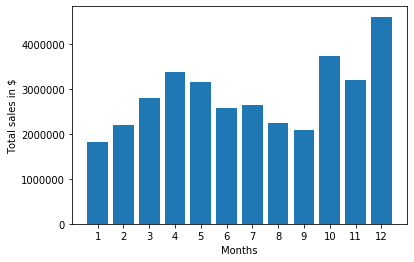

In [44]:
#visualizing the data
import matplotlib.pyplot as plt

months=range(1,13)

plt.bar(months,result)
plt.xticks(months)
plt.ylabel('Total sales in $')
plt.xlabel('Months')

### which city sold the most product ?

In [45]:
year_data.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [63]:
#year_data['State']=year_data['Purchase Address'].split(',',1)[1]

year_data['City']=year_data['Purchase Address'].apply(lambda x: x.split(',')[1])
#year_data['State']=year_data['Purchase Address'].apply(lambda x: x.split(',')[2])
year_data.head(5)



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001


In [47]:
year_data.shape

(185950, 9)

In [65]:
year_data['State']=year_data['Purchase Address'].apply(lambda x: x.split(',')[2])

In [54]:
year_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001


In [66]:
year_data['City']=year_data['City']+'('+year_data['State'].apply(lambda x: x.split(' ')[1])+')'

In [68]:
year_data.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),CA 90001


In [70]:
year_data.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Amount
City,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


In [74]:
result2=year_data.groupby('City').sum()
result2=result2.sort_values('City')
result2


,Quantity Ordered,Price Each,Month,Amount
City,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


In [81]:
year_data=year_data.sort_values('City')
cities=year_data['City'].unique()


Text(0, 0.5, 'Total Sales in USD($)')

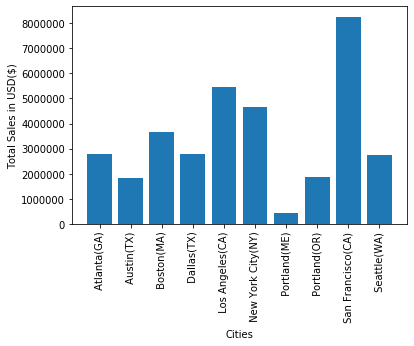

In [84]:
plt.bar(cities,result2['Amount'])
plt.xticks(cities,rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Total Sales in USD($)')

##### Question 3. What time should we display advertisements to maximise likelihood of customer's buying product ?

In [85]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State
1753,142902,ThinkPad Laptop,1,999.99,01/20/19 11:15,"362 Main St, Atlanta, GA 30301",1,999.99,Atlanta(GA),GA 30301
1794,238393,USB-C Charging Cable,2,11.95,08/15/19 19:21,"39 Wilson St, Atlanta, GA 30301",8,23.90,Atlanta(GA),GA 30301
1494,260775,Wired Headphones,1,11.99,10/30/19 12:19,"302 Spruce St, Atlanta, GA 30301",10,11.99,Atlanta(GA),GA 30301
10235,232706,iPhone,1,700.00,07/19/19 17:56,"477 Elm St, Atlanta, GA 30301",7,700.00,Atlanta(GA),GA 30301
10253,232723,AAA Batteries (4-pack),1,2.99,07/11/19 22:33,"417 South St, Atlanta, GA 30301",7,2.99,Atlanta(GA),GA 30301


In [96]:
year_data['Order Date']=pd.to_datetime(year_data['Order Date'])

In [98]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City
1753,142902,ThinkPad Laptop,1,999.99,2019-01-20 11:15:00,"362 Main St, Atlanta, GA 30301",1,999.99,Atlanta(GA)
1794,238393,USB-C Charging Cable,2,11.95,2019-08-15 19:21:00,"39 Wilson St, Atlanta, GA 30301",8,23.90,Atlanta(GA)
1494,260775,Wired Headphones,1,11.99,2019-10-30 12:19:00,"302 Spruce St, Atlanta, GA 30301",10,11.99,Atlanta(GA)
10235,232706,iPhone,1,700.00,2019-07-19 17:56:00,"477 Elm St, Atlanta, GA 30301",7,700.00,Atlanta(GA)
10253,232723,AAA Batteries (4-pack),1,2.99,2019-07-11 22:33:00,"417 South St, Atlanta, GA 30301",7,2.99,Atlanta(GA)


In [107]:
year_data['hour']=year_data['Order Date'].dt.hour
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,hour
1753,142902,ThinkPad Laptop,1,999.99,2019-01-20 11:15:00,"362 Main St, Atlanta, GA 30301",1,999.99,Atlanta(GA),11
1794,238393,USB-C Charging Cable,2,11.95,2019-08-15 19:21:00,"39 Wilson St, Atlanta, GA 30301",8,23.90,Atlanta(GA),19
1494,260775,Wired Headphones,1,11.99,2019-10-30 12:19:00,"302 Spruce St, Atlanta, GA 30301",10,11.99,Atlanta(GA),12
10235,232706,iPhone,1,700.00,2019-07-19 17:56:00,"477 Elm St, Atlanta, GA 30301",7,700.00,Atlanta(GA),17
10253,232723,AAA Batteries (4-pack),1,2.99,2019-07-11 22:33:00,"417 South St, Atlanta, GA 30301",7,2.99,Atlanta(GA),22


In [124]:
#group amount transacted with hours
result3=year_data.groupby('hour').sum()
result3

,Quantity Ordered,Price Each,Month,Amount
hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


Text(0, 0.5, 'Amount in USD($)')

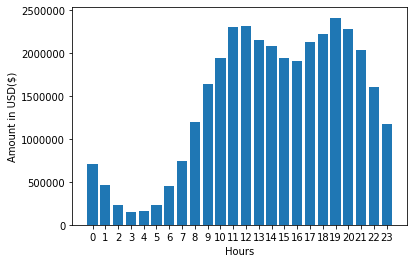

In [125]:
#plotting above data
hours=range(0,24)
plt.bar(hours,result3['Amount'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Amount in USD($)')

In [119]:
#analysis -- advertisements should be shown between 11 am-1 pm and 8 pm-9 pm to increase the probability of customers
#buying product

#### Question 4. Which products are most sold together? 

In [126]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,hour
1753,142902,ThinkPad Laptop,1,999.99,2019-01-20 11:15:00,"362 Main St, Atlanta, GA 30301",1,999.99,Atlanta(GA),11
1794,238393,USB-C Charging Cable,2,11.95,2019-08-15 19:21:00,"39 Wilson St, Atlanta, GA 30301",8,23.90,Atlanta(GA),19
1494,260775,Wired Headphones,1,11.99,2019-10-30 12:19:00,"302 Spruce St, Atlanta, GA 30301",10,11.99,Atlanta(GA),12
10235,232706,iPhone,1,700.00,2019-07-19 17:56:00,"477 Elm St, Atlanta, GA 30301",7,700.00,Atlanta(GA),17
10253,232723,AAA Batteries (4-pack),1,2.99,2019-07-11 22:33:00,"417 South St, Atlanta, GA 30301",7,2.99,Atlanta(GA),22


In [142]:
df=year_data[year_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,hour
1468,260752,Flatscreen TV,1,300.00,2019-10-07 08:18:00,"36 Park St, Atlanta, GA 30301",10,300.00,Atlanta(GA),8
4652,252615,iPhone,1,700.00,2019-09-11 16:08:00,"746 Sunset St, Atlanta, GA 30301",9,700.00,Atlanta(GA),16
1467,260752,USB-C Charging Cable,2,11.95,2019-10-07 08:18:00,"36 Park St, Atlanta, GA 30301",10,23.90,Atlanta(GA),8
4653,252615,Lightning Charging Cable,1,14.95,2019-09-11 16:08:00,"746 Sunset St, Atlanta, GA 30301",9,14.95,Atlanta(GA),16
4654,252615,Wired Headphones,1,11.99,2019-09-11 16:08:00,"746 Sunset St, Atlanta, GA 30301",9,11.99,Atlanta(GA),16
...,...,...,...,...,...,...,...,...,...,...
1547,163480,iPhone,1,700.00,2019-03-02 13:48:00,"206 Hill St, Seattle, WA 98101",3,700.00,Seattle(WA),13
16194,274801,27in 4K Gaming Monitor,1,389.99,2019-10-20 13:25:00,"789 Maple St, Seattle, WA 98101",10,389.99,Seattle(WA),13
1548,163480,Lightning Charging Cable,1,14.95,2019-03-02 13:48:00,"206 Hill St, Seattle, WA 98101",3,14.95,Seattle(WA),13
15414,310390,Google Phone,1,600.00,2019-12-03 19:39:00,"2 Wilson St, Seattle, WA 98101",12,600.00,Seattle(WA),19


In [131]:
df.sort_values('Order ID')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,hour
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin(TX),16
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin(TX),16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles(CA),8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles(CA),8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City(NY),11
...,...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland(OR),0
25040,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City(NY),8
25041,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City(NY),8
25076,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin(TX),22


In [143]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df=df[['Order ID','Grouped']].drop_duplicates()
df.head(50)


C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
1468,260752,"Flatscreen TV,USB-C Charging Cable"
4652,252615,"iPhone,Lightning Charging Cable,Wired Headphones"
10031,232505,"27in FHD Monitor,Wired Headphones"
1409,260697,"Wired Headphones,Google Phone"
9950,232426,"20in Monitor,Google Phone"
1868,238461,"Macbook Pro Laptop,Apple Airpods Headphones"
1642,260915,"USB-C Charging Cable,Vareebadd Phone"
4696,252657,"iPhone,Lightning Charging Cable"
995,260300,"USB-C Charging Cable,Vareebadd Phone"
1385,260676,"USB-C Charging Cable,Macbook Pro Laptop"


In [155]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
        row_list=row.split(',')
        count.update(Counter(combinations(row_list,2)))

#print (count)
count.most_common(10)

[(('Lightning Charging Cable', 'iPhone'), 550),
 (('USB-C Charging Cable', 'Google Phone'), 544),
 (('iPhone', 'Lightning Charging Cable'), 465),
 (('Google Phone', 'USB-C Charging Cable'), 455),
 (('Wired Headphones', 'iPhone'), 254),
 (('Wired Headphones', 'Google Phone'), 220),
 (('iPhone', 'Wired Headphones'), 208),
 (('Google Phone', 'Wired Headphones'), 203),
 (('Apple Airpods Headphones', 'iPhone'), 201),
 (('USB-C Charging Cable', 'Vareebadd Phone'), 186)]

#### Question 5.What product sold the most?why do you think it sold the most?


In [156]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,hour
1753,142902,ThinkPad Laptop,1,999.99,2019-01-20 11:15:00,"362 Main St, Atlanta, GA 30301",1,999.99,Atlanta(GA),11
1794,238393,USB-C Charging Cable,2,11.95,2019-08-15 19:21:00,"39 Wilson St, Atlanta, GA 30301",8,23.90,Atlanta(GA),19
1494,260775,Wired Headphones,1,11.99,2019-10-30 12:19:00,"302 Spruce St, Atlanta, GA 30301",10,11.99,Atlanta(GA),12
10235,232706,iPhone,1,700.00,2019-07-19 17:56:00,"477 Elm St, Atlanta, GA 30301",7,700.00,Atlanta(GA),17
10253,232723,AAA Batteries (4-pack),1,2.99,2019-07-11 22:33:00,"417 South St, Atlanta, GA 30301",7,2.99,Atlanta(GA),22


In [179]:
result5=year_data.groupby('Product').sum()['Quantity Ordered']
#result5.loc[result5['Quantity Ordered']==result5.max()]
result5

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [189]:
#most sold products
print (result5.argmax()+'    '+str(result5.max()))


AAA Batteries (4-pack)    31017


C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


Text(0, 0.5, 'Quantity sold')

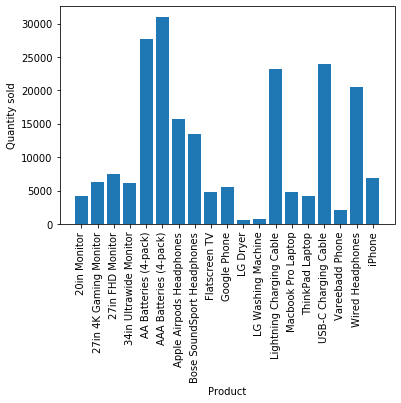

In [198]:
product_group=year_data.groupby('Product')
products=[product for product,df in product_group]
products

plt.bar(products,result5)
plt.xticks(products,rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity sold')

In [201]:
prices=year_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

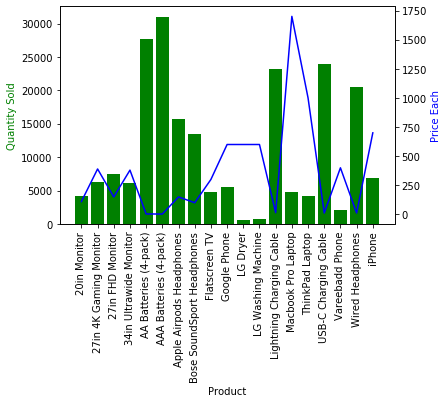

In [212]:
#overlapping above graph with the value of prices for each product

fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,result5,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation='vertical')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold',color='g')
ax2.set_ylabel('Price Each',color='b')

plt.show()

#### Question 6. Who are the repeat customers?

In [227]:
address=year_data['Purchase Address'].unique()
address

array(['362 Main St, Atlanta, GA 30301',
       '39 Wilson St, Atlanta, GA 30301',
       '302 Spruce St, Atlanta, GA 30301', ...,
       '721 Pine St, Seattle, WA 98101',
       '109 Cedar St, Seattle, WA 98101',
       '756 Lake St, Seattle, WA 98101'], dtype=object)

In [264]:
#df2=pd.merge(year_data[['Purchase Address','Order Date']],year_data[address],on=year_data['address']==address,how='right')
#year_data.groupby('Purchase Address').sum()
df2=year_data[['Purchase Address','Order Date']]
#df3=pd.merge(year_data,df2,on='Purchase Address' and 'Order Date' ,how='inner')
#df2.sort_values('Order Date'/groupby('Purchase Address'))
df3=df2['Purchase Address'].unique()
#df3.sort_values(['Purchase Address','Order Date'],ascending=[1,1])
df3_dataframe = pd.DataFrame(df3)      

df3_dataframe.rename(index=str, columns={0:'Purchase Address'})
#df4=pd.DataFrame(df3,columns='Purchase Address')


,Purchase Address
0,"362 Main St, Atlanta, GA 30301"
1,"39 Wilson St, Atlanta, GA 30301"
2,"302 Spruce St, Atlanta, GA 30301"
3,"477 Elm St, Atlanta, GA 30301"
4,"417 South St, Atlanta, GA 30301"
...,...
140782,"9 10th St, Seattle, WA 98101"
140783,"276 Forest St, Seattle, WA 98101"
140784,"721 Pine St, Seattle, WA 98101"
140785,"109 Cedar St, Seattle, WA 98101"


In [265]:
df3=pd.merge(df3_dataframe,df2,on='Purchase Address'  ,how='inner')

KeyError: 'Purchase Address'

In [230]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,hour
1753,142902,ThinkPad Laptop,1,999.99,2019-01-20 11:15:00,"362 Main St, Atlanta, GA 30301",1,999.99,Atlanta(GA),11
1794,238393,USB-C Charging Cable,2,11.95,2019-08-15 19:21:00,"39 Wilson St, Atlanta, GA 30301",8,23.90,Atlanta(GA),19
1494,260775,Wired Headphones,1,11.99,2019-10-30 12:19:00,"302 Spruce St, Atlanta, GA 30301",10,11.99,Atlanta(GA),12
10235,232706,iPhone,1,700.00,2019-07-19 17:56:00,"477 Elm St, Atlanta, GA 30301",7,700.00,Atlanta(GA),17
10253,232723,AAA Batteries (4-pack),1,2.99,2019-07-11 22:33:00,"417 South St, Atlanta, GA 30301",7,2.99,Atlanta(GA),22
